/home/aiml-machine/FML-experiments/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Accuracy on mnist_test.csv: 89.67%


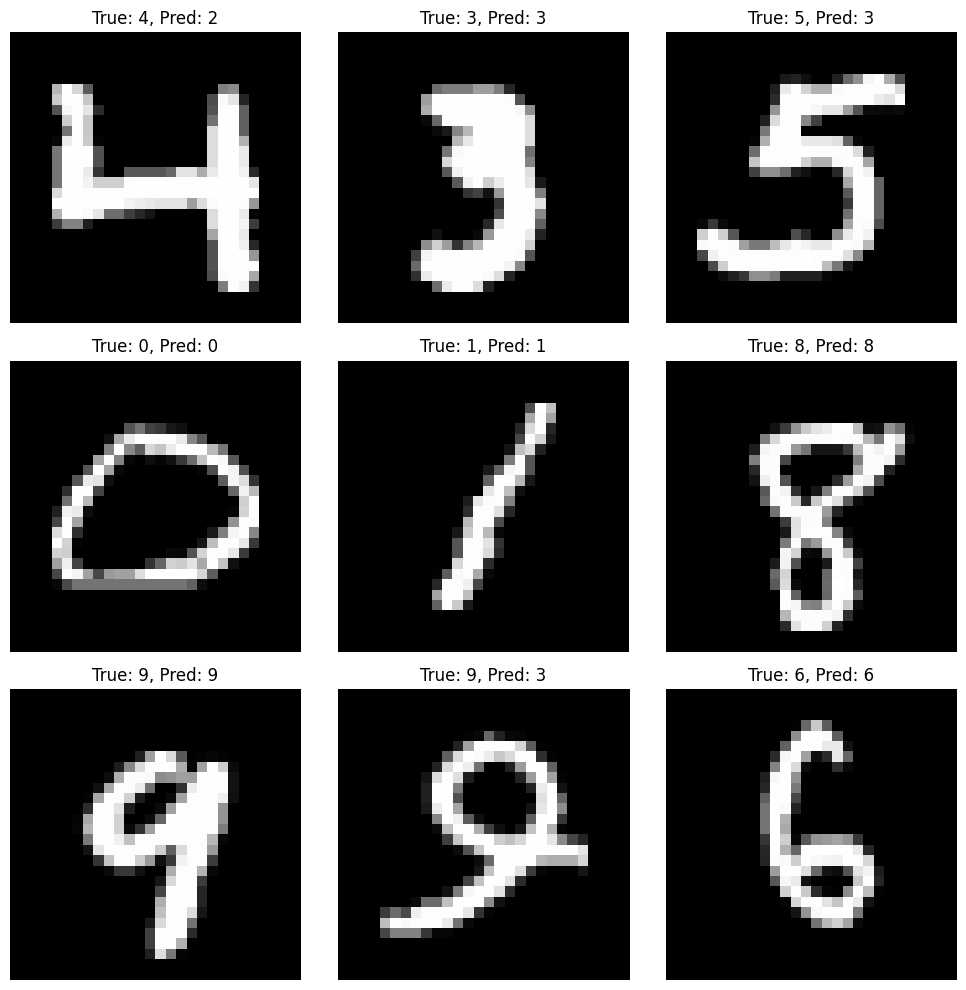

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the training dataset without assuming any header
train_file_path = 'mnist_train_small.csv'  # Replace with your actual training file path
train_data = pd.read_csv(train_file_path, header=None)

# Load the test dataset without assuming any header
test_file_path = 'mnist_test.csv'  # Replace with your actual test file path
test_data = pd.read_csv(test_file_path, header=None)

# Rename columns for both train and test datasets
column_names = ['label'] + [f'pixel{i}' for i in range(784)]
train_data.columns = column_names
test_data.columns = column_names

# Separate features and labels
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

# Scale the pixel values based on training data statistics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# Train the model on the entire training set
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on mnist_test.csv: {accuracy * 100:.2f}%")

# --- Visualization Part ---
# Select a few samples to visualize
num_samples = 9  # Number of images to show
indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(10, 10))

for i, idx in enumerate(indices):
    image = X_test.iloc[idx].values.reshape(28, 28)  # Reshape back to 28x28
    true_label = y_test.iloc[idx]
    predicted_label = y_pred[idx]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
